# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [ ]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

# Assignment 3 (Building a Custome Visualization)- Solution

Enter the Y-axis value: 43000


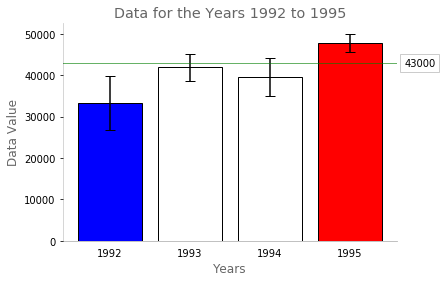

In [10]:
###     IMPORT LIBRARIES     ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t


###     FUNCTION DEFINITIONS     ###
# Define a Function to calculate the Mean Error
def mean_err(data):
    semval = sem(data)                                    # Calculate the Standard Error of the Means
    tval   = t.ppf((1 + conf_int) / 2, (len(data) - 1))   # Calculate the T value at the Confidence Interval
    merr   = (semval * tval)                              # Calculate the Mean Error
    return merr

###     DATA PREPARATIONS     ###
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])

conf_int = 0.95  # Confidence Interval is 95%

# Create an array for the Mean values for the years 1992 - 1995
a_mean = (np.array(df.iloc[0,:]).mean(),                  # for 1992
          np.array(df.iloc[1,:]).mean(),                  # for 1993
          np.array(df.iloc[2,:]).mean(),                  # for 1994
          np.array(df.iloc[3,:]).mean())                  # for 1995

# Create an array for the Mean Errors for the years 1992 -1995
a_merr = (mean_err(np.array(df.iloc[0,:])),               # for 1992
          mean_err(np.array(df.iloc[1,:])),               # for 1993
          mean_err(np.array(df.iloc[2,:])),               # for 1994
          mean_err(np.array(df.iloc[3,:])))               # for 1995


###     DATA VISUALIZATION     ###
yval = input('Enter the Y-axis value: ')
yval = int(float(yval))

clr = []
for i, j in zip(a_mean, a_merr):
    if (i + j > yval) and (i - j > yval):
        clr.append("red")
    elif (i + j < yval) and (i - j < yval):
        clr.append("blue")
    else:
        clr.append("white")

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(left = (1, 2, 3, 4), 
       height = a_mean, 
       yerr = a_merr, 
       tick_label = ["1992", "1993", "1994", "1995"],
       capsize = 5,
       color = clr,
       edgecolor = "black")

plt.title("Data for the Years 1992 to 1995", fontsize = "x-large", alpha = 0.6)
ax.set_xlabel("Years", fontsize = 'large', alpha = 0.6)
ax.set_ylabel("Data Value", fontsize = 'large', alpha = 0.6)
ax.tick_params(top = 'off', right = 'off', bottom = 'off')
ax.axhline(yval, color="green", linewidth = 1, alpha = 0.6)
ax.text(1.02, yval, yval, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.2),
       transform=ax.get_yaxis_transform())

# Remove the Outer frame from all 4 sides
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

# Set only the Bottom frame visible
ax.spines['left'].set_visible(True)
ax.spines['left'].set_alpha(0.2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

plt.show()    

###     CALCULATED VALUES FOR VERIFICATION     ###
# ----     ----------------     ----------------     -----------     -----------
# YEAR     MEAN                 MEAN ERROR (ME)      (MEAN + ME)     (M - ME)
# ----     ----------------     ----------------     -----------     -----------
# 92       33312.1074755443     6510.93801801402     39823.04549     26801.16946
# 93       41861.8595410733     3193.25484437759     45055.11439     38668.60470
# 94       39493.3049413988     4555.32959160197     44048.63453     34937.97535
# 95       47743.5509692670     2264.56129089468     50008.11226     45478.98968
# ----     ----------------     ----------------     -----------     -----------
